# Comparison of Spotify vs Deezer popularity

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('../../Data/Processed/spotify_deezer_merged.csv')
df.describe()

,spotify.duration_ms,spotify.popularity,spotify.album.total_tracks,spotify.disc_number,deezer.id,deezer.duration,deezer.rank
count,1.807350e+05,180735.000000,180735.000000,180735.000000,1.807350e+05,180735.000000,180735.000000
mean,2.013794e+05,39.537455,9.695344,1.011580,1.457355e+09,200.916602,21.278052
std,7.619552e+04,17.486902,10.105525,0.147437,1.002692e+09,76.191073,19.704377
min,3.000000e+04,1.000000,1.000000,1.000000,2.007840e+05,0.000000,0.000100
25%,1.662080e+05,27.000000,1.000000,1.000000,5.708046e+08,166.000000,5.240400
50%,1.941810e+05,40.000000,10.000000,1.000000,1.411281e+09,194.000000,15.512300
75%,2.261355e+05,52.000000,14.000000,1.000000,2.322950e+09,226.000000,31.753650
max,8.972714e+06,100.000000,930.000000,17.000000,3.325513e+09,8972.000000,100.000000


In [46]:
df['isrc_prefix'] = df['spotify.external_ids.isrc'].str[:2]

# Drop rows with no ISRC
df = df.dropna(subset=['spotify.external_ids.isrc'])

# Capitalize all ISRC codes
df['isrc_prefix'] = df['isrc_prefix'].str.upper()

# Map QZ, QT, and QM to US in the isrc_prefix column
# All of these are just alternative codes for US
df['isrc_prefix'] = df['isrc_prefix'].replace({'QZ': 'US', 'QT': 'US', 'QM': 'US'})
# Same for Brazil
df['isrc_prefix'] = df['isrc_prefix'].replace({'BX': 'BR', 'BP': 'BR', 'BC': 'BR'})

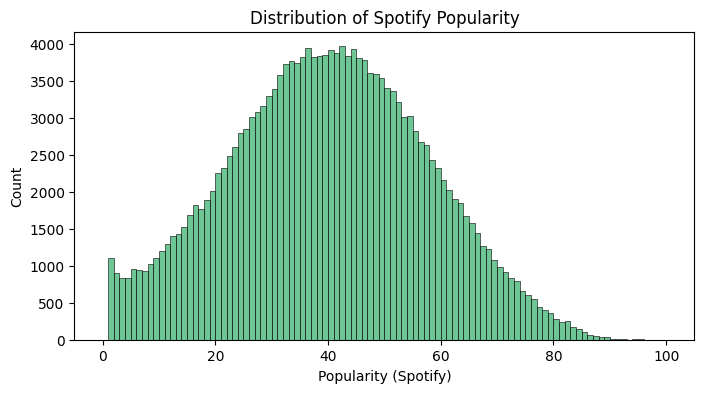

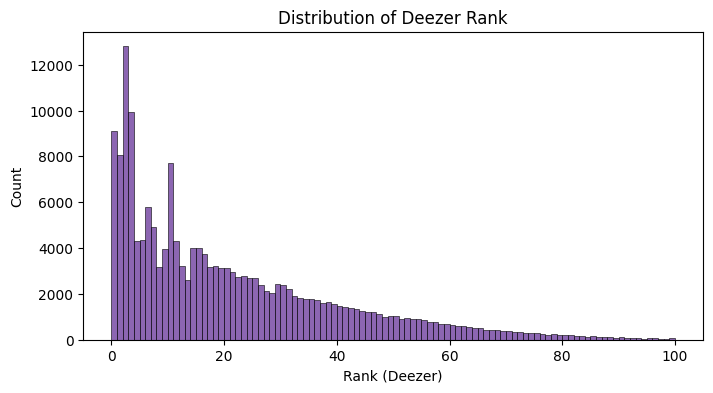

In [47]:
# Plot histogram of Spotify popularity
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='spotify.popularity', bins=100, kde=False, color='mediumseagreen', binrange=(0, 100))
plt.title('Distribution of Spotify Popularity')
plt.xlabel('Popularity (Spotify)')
plt.ylabel('Count')
plt.show()

# Plot histogram of Deezer rank
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='deezer.rank', bins=100, kde=False, color='rebeccapurple', binrange=(0, 100))
plt.title('Distribution of Deezer Rank')
plt.xlabel('Rank (Deezer)')
plt.ylabel('Count')
plt.show()

In [48]:
min_songs = 3000
min_popularity = 1

# Filter out countries with fewer than min_songs entries based on 'isrc_prefix'
df_filtered = df[(df['spotify.popularity'] >= min_popularity) & (df['deezer.rank'] >= min_popularity)]
df_filtered = df_filtered.groupby('isrc_prefix').filter(lambda group: len(group) >= min_songs)


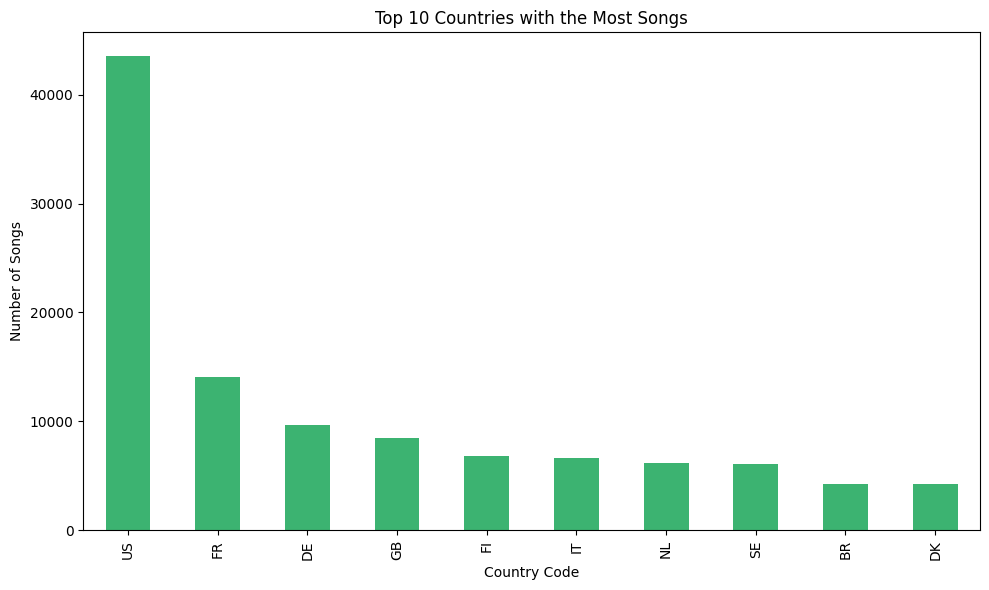

In [ ]:
# Count the number of songs for each country
country_song_counts = df_filtered['isrc_prefix'].value_counts()

# Select the top 10 countries
top_10_countries = country_song_counts.head(10)

# Plot the data
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='mediumseagreen')

# Add labels and title
plt.title('Top 10 Countries with the Most Songs')
plt.xlabel('Country Code')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

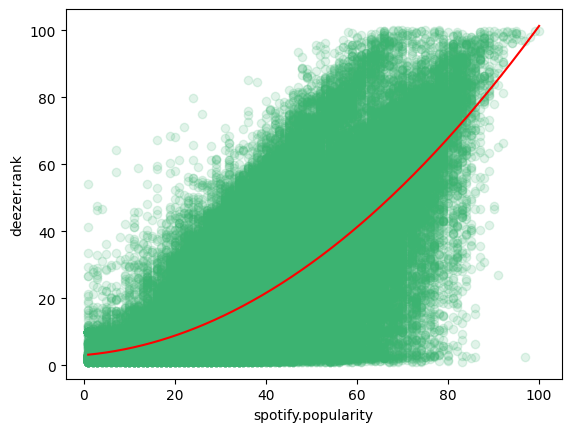

In [49]:
sns.regplot(
    x='spotify.popularity',
    y='deezer.rank',
    data=df_filtered,
    scatter_kws={'alpha': 0.15, 'color': 'mediumseagreen'},
    fit_reg=False
)

# Extract x and y
x = df_filtered['spotify.popularity'].values
y = df_filtered['deezer.rank'].values

# Fit cubic polynomial with intercept
coefs = np.polyfit(x, y, deg=2)
a, b, c = coefs

# Generate smooth curve
x_curve = np.linspace(x.min(), x.max(), 500)
y_curve = a * x_curve**2 + b * x_curve + c

# Plot curve
plt.plot(x_curve, y_curve, color='red')

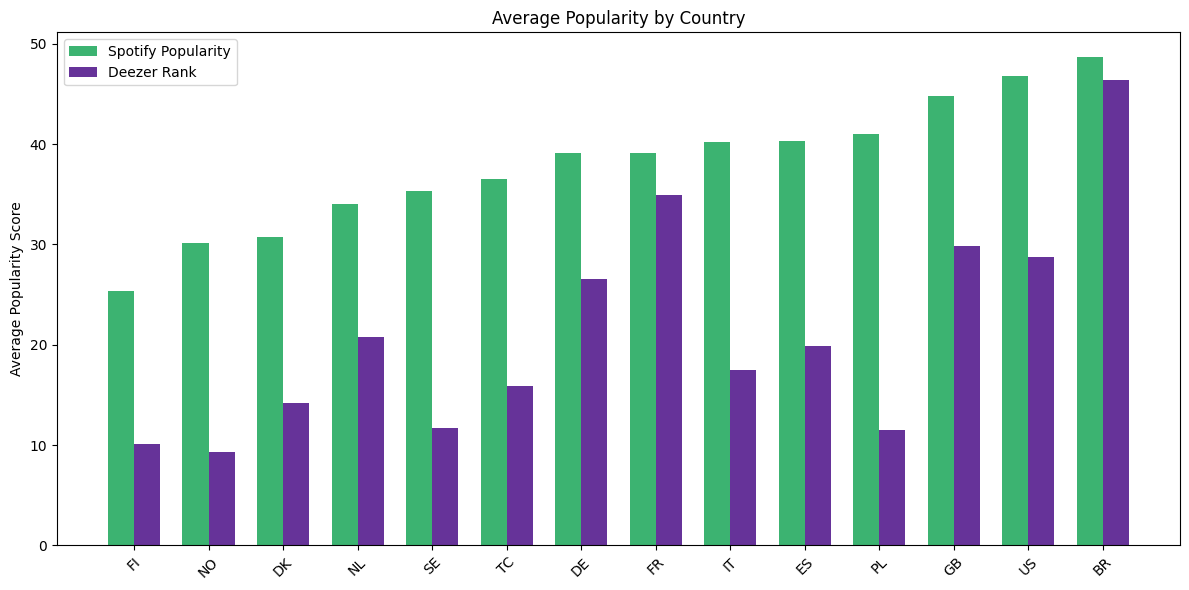

In [50]:
# Group by country code and compute the mean popularity scores for Spotify and Deezer rank.
df_grouped = df_filtered.groupby('isrc_prefix').agg({
    'spotify.popularity': 'mean',
    'deezer.rank': 'mean'
}).reset_index()

df_grouped.sort_values('spotify.popularity', inplace=True)

#bar plots to compare the two popularity measures

labels = df_grouped['isrc_prefix']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

spotify_bars = ax.bar(x - width/2, df_grouped['spotify.popularity'], width, label='Spotify Popularity', color='mediumseagreen')
deezer_bars = ax.bar(x + width/2, df_grouped['deezer.rank'], width, label='Deezer Rank', color='rebeccapurple')

# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Popularity Score')
ax.set_title('Average Popularity by Country')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

Deezer is in fact French, and it shows here

In [51]:
from scipy.stats import zscore

# Calculate z-scores for spotify.popularity and deezer.rank for each song
df_filtered['spotify.popularity_zscore'] = zscore(df_filtered['spotify.popularity'])
df_filtered['deezer.rank_zscore'] = zscore(df_filtered['deezer.rank'])

# Display the first few rows to verify
df_filtered.head()

,spotify.name,spotify.album.name,spotify.duration_ms,spotify.popularity,spotify.id,spotify.external_ids.isrc,spotify.album.release_date_precision,spotify.album.release_date,spotify.album.total_tracks,spotify.disc_number,...,deezer.album,deezer.duration,deezer.link,deezer.rank,deezer.release_date,deezer.explicit_lyrics,deezer.isrc,isrc_prefix,spotify.popularity_zscore,deezer.rank_zscore
0,Imagine,Imagine,165775,68,6IcsbETuviVu6UTiBTcxY4,FR9W12422486,day,2024-05-03,1,1,...,Imagine,165.0,https://www.deezer.com/track/2767945501,100.0000,2024-05-03,False,FR9W12422486,FR,1.553266,3.662576
1,SOIS PAS TIMIDE,LE NORD SE SOUVIENT,165978,69,1sccu8ze6ETRiNbNH9pj5N,FR8FB2412100,day,2024-09-13,9,1,...,SOIS PAS TIMIDE,165.0,https://www.deezer.com/track/2892756462,100.0000,2024-07-19,False,FR8FB2412100,FR,1.610504,3.662576
2,NANANI NANANA,APOCALYPSE,217693,78,0qlYaRFGvgR6afy1f4BBwD,FR9W12456468,day,2024-11-29,15,1,...,APOCALYPSE,218.0,https://www.deezer.com/track/3102004051,100.0000,2024-11-29,True,FR9W12456468,FR,2.125647,3.662576
3,Dolce Camara,AD VITAM ÆTERNAM,178401,70,15vGti1ooNZFlDUdlLukX6,FR8R62400004,day,2024-02-08,10,1,...,AD VITAM ÆTERNAM,178.0,https://www.deezer.com/track/2654111972,99.9856,2024-02-08,True,FR8R62400004,FR,1.667742,3.661874
4,POUR ELLE,A LA VIE A LA MORT,179034,75,5jX61gvbNenSDMldQrbtsU,FRUM72401057,day,2024-09-26,14,1,...,A LA VIE A LA MORT,179.0,https://www.deezer.com/track/3015707051,99.9852,2024-09-26,True,FRUM72401057,FR,1.953933,3.661855


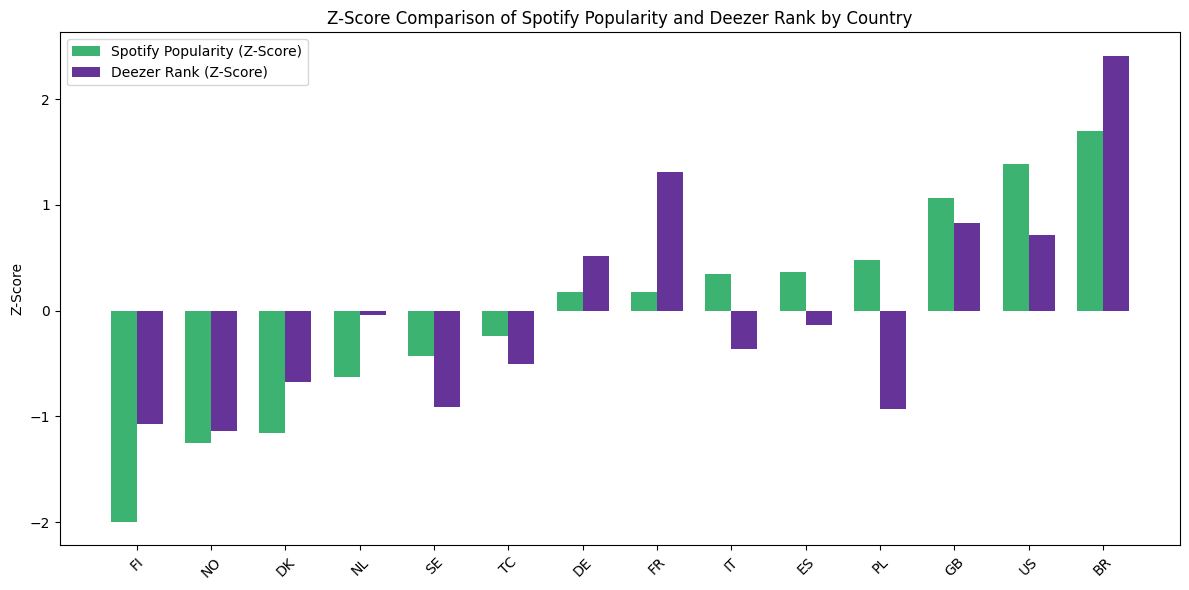

In [52]:
# Bar plots to compare the z-scores of the two popularity measures
# Calculate z-scores for spotify.popularity and deezer.rank
df_grouped['spotify.popularity_zscore'] = zscore(df_grouped['spotify.popularity'])
df_grouped['deezer.rank_zscore'] = zscore(df_grouped['deezer.rank'])

fig, ax = plt.subplots(figsize=(12, 6))

spotify_bars = ax.bar(x - width/2, df_grouped['spotify.popularity_zscore'], width, label='Spotify Popularity (Z-Score)', color='mediumseagreen')
deezer_bars = ax.bar(x + width/2, df_grouped['deezer.rank_zscore'], width, label='Deezer Rank (Z-Score)', color='rebeccapurple')

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Z-Score')
ax.set_title('Z-Score Comparison of Spotify Popularity and Deezer Rank by Country')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


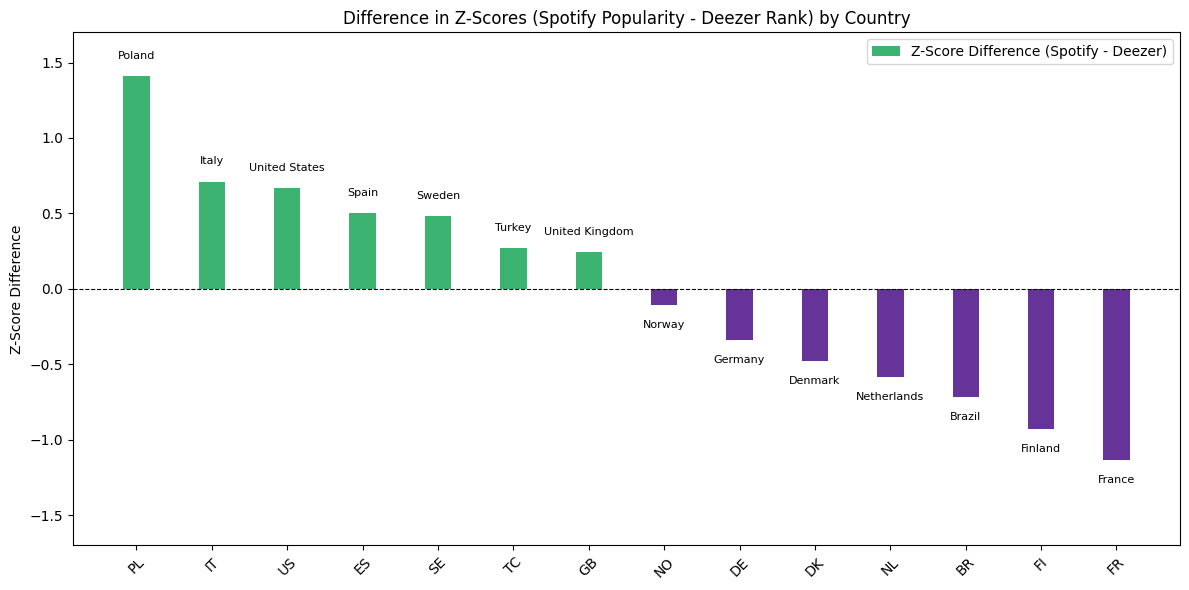

In [53]:
# Calculate the difference in z-scores
df_grouped['zscore_difference'] = df_grouped['spotify.popularity_zscore'] - df_grouped['deezer.rank_zscore']

# Sort the dataframe by zscore_difference
df_grouped = df_grouped.sort_values('zscore_difference', ascending=False)

# Update the labels and x positions for the sorted data
labels = df_grouped['isrc_prefix']
x = np.arange(len(labels))

# Plot the difference in z-scores
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(
    x, 
    df_grouped['zscore_difference'], 
    width, 
    color=['mediumseagreen' if val > 0 else 'rebeccapurple' for val in df_grouped['zscore_difference']], 
    label='Z-Score Difference (Spotify - Deezer)'
)
# Add country names as text annotations
# Half ai generated, waiting for the final dataset to finalize the list
country_names = {
    'CO': 'Colombia', 'SE': 'Sweden', 'FI': 'Finland', 'ES': 'Spain', 'GR': 'Greece',
    'NL': 'Netherlands', 'IT': 'Italy', 'AR': 'Argentina', 'US': 'United States',
    'GB': 'United Kingdom', 'DK': 'Denmark', 'DE': 'Germany', 'CA': 'Canada',
    'CH': 'Switzerland', 'BR': 'Brazil', 'BE': 'Belgium', 'FR': 'France',
    'RU': 'Russia', 'PT': 'Portugal', 'NO': 'Norway', 'AU': 'Australia',
    'TC': 'Turkey', 'IE': 'Ireland', 'MX': 'Mexico', 'JP': 'Japan',
    'ZA': 'South Africa', 'IN': 'India', 'PL': 'Poland',
    'BG': 'Bulgaria', 'CL': 'Chile', 'PH': 'Philippines', 'TH': 'Thailand',
    'ID': 'Indonesia', 'MY': 'Malaysia', 'SG': 'Singapore',
    'EG': 'Egypt', 'KE': 'Kenya', 'NG': 'Nigeria', 'PK': 'Pakistan',
    'KR': 'South Korea', 'VN': 'Vietnam', 'HK': 'Hong Kong',
    'CZ': 'Czech Republic', 'AT': 'Austria', 'HU': 'Hungary',
    'DG': 'Dominican Republic', 'PE': 'Peru', 'RO': 'Romania',
    'IL': 'Israel', 'TR': 'Turkey', 'UA': 'Ukraine', 'BY': 'Belarus',
    'TW': 'Taiwan', 'LK': 'Sri Lanka', 'QA': 'Qatar',
    'IS': 'Iceland', 'LV': 'Latvia', 'LT': 'Lithuania',
}

for i, bar in enumerate(bars):
    height = bar.get_height()
    country_name = country_names[labels.iloc[i]]
    if height > 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.1, country_name, ha='center', va='bottom', fontsize=8)
    else:
        ax.text(bar.get_x() + bar.get_width() / 2, height - 0.1, country_name, ha='center', va='top', fontsize=8)
        
# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Z-Score Difference')
ax.set_title('Difference in Z-Scores (Spotify Popularity - Deezer Rank) by Country')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax.legend()

plt.ylim(-1.7, 1.7)
plt.tight_layout()
plt.show()

3 out of 5 countries where deezer is more popular speek French, which is still an effect of deezer being French probably

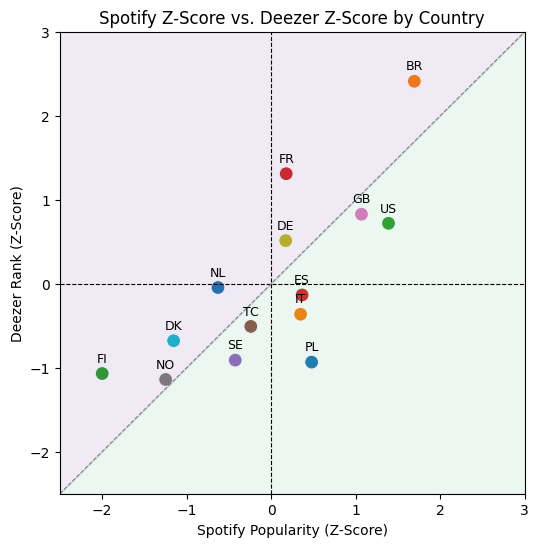

In [71]:
# Scatter plot: Spotify Z-Score vs. Deezer Z-Score
plt.figure(figsize=(6, 6))
sns.scatterplot(x='spotify.popularity_zscore', y='deezer.rank_zscore', data=df_grouped, hue='isrc_prefix', palette='tab10', s=100)

# Add labels and title
plt.title('Spotify Z-Score vs. Deezer Z-Score by Country')
plt.xlabel('Spotify Popularity (Z-Score)')
plt.ylabel('Deezer Rank (Z-Score)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
# Add a diagonal line
plt.plot([-2.5, 3], [-2.5, 3], color='gray', linestyle='--', linewidth=0.8)
# Fill the background below the diagonal line with green
plt.fill_between(
    [-2.5, 3], [-2.5, 3], 3, 
    color='rebeccapurple', alpha=0.1
)

# Fill the background above the diagonal line with purple
plt.fill_between(
    [-2.5, 3], [-2.5, 3], -2.5, 
    color='mediumseagreen', alpha=0.1
)

# Annotate each point with the country code
for i, row in df_grouped.iterrows():
    plt.text(row['spotify.popularity_zscore'], row['deezer.rank_zscore'] + 0.1, row['isrc_prefix'], 
             fontsize=9, ha='center', va='bottom', color='black')

# plt.legend(title='Country Code', bbox_to_anchor=(1.05, 1), loc='upper left', 
#            labels=sorted(df_grouped['isrc_prefix'].unique()))
plt.legend([], [], frameon=False)
plt.xlim(-2.5, 3)
plt.ylim(-2.5, 3)
# plt.tight_layout()
plt.show()

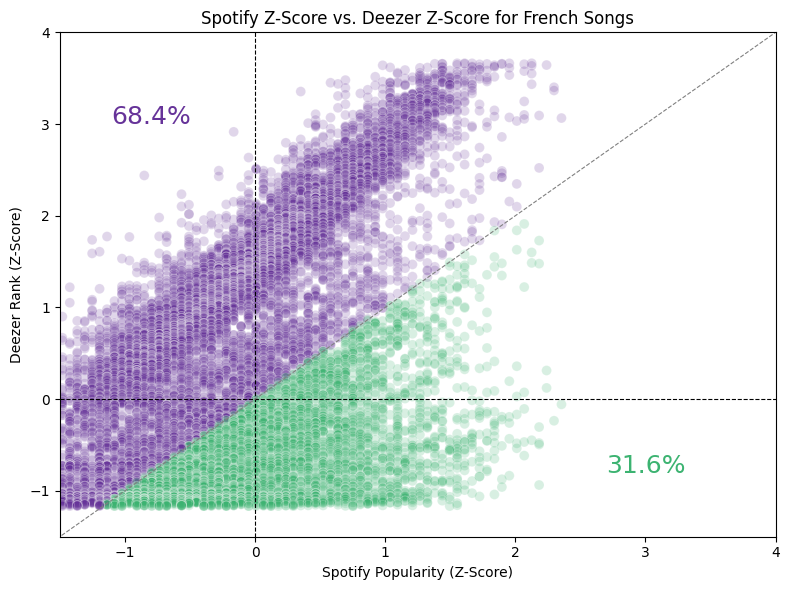

In [76]:
# Filter for French songs
df_french = df_filtered[df_filtered['isrc_prefix'] == 'FR']

plt.figure(figsize=(8, 6))
# Determine colors based on comparison
colors = df_french.apply(
    lambda row: 'mediumseagreen' if row['spotify.popularity_zscore'] > row['deezer.rank_zscore'] else 'rebeccapurple', 
    axis=1
)

# Calculate the percentage of songs in each half
above_diagonal = (df_french['spotify.popularity_zscore'] > df_french['deezer.rank_zscore']).sum()
below_diagonal = len(df_french) - above_diagonal
total_songs = len(df_french)

percent_above = (above_diagonal / total_songs) * 100
percent_below = (below_diagonal / total_songs) * 100

# Add text annotations for percentages
plt.text(3.0, -0.8, f'{percent_above:.1f}%', color='mediumseagreen', fontsize=18, ha='center')
plt.text(-0.8, 3.0, f'{percent_below:.1f}%', color='rebeccapurple', fontsize=18, ha='center')

# Scatter plot: Spotify Z-Score vs. Deezer Z-Score for French songs
sns.scatterplot(
    x='spotify.popularity_zscore', 
    y='deezer.rank_zscore', 
    data=df_french, 
    color=colors, 
    legend=False, 
    s=50,
    alpha=0.2
)

# Add labels and title
plt.title('Spotify Z-Score vs. Deezer Z-Score for French Songs')
plt.xlabel('Spotify Popularity (Z-Score)')
plt.ylabel('Deezer Rank (Z-Score)')

# Set the same axis limits
plt.xlim(-1.5, 4)
plt.ylim(-1.5, 4)

# Add reference lines
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
# Add a diagonal line
plt.plot([-3, 4], [-3, 4], color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()

In [56]:
from scipy.stats import ttest_rel
from scipy.stats import pearsonr

# Perform a paired t-test
t_stat, p_value = ttest_rel(df_french['spotify.popularity_zscore'], df_french['deezer.rank_zscore'])

# Display the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Calculate Pearson's r
pearson_r, p_value_pearson = pearsonr(df_french['spotify.popularity_zscore'], df_french['deezer.rank_zscore'])

# Display the results
print(f"Pearson's r: {pearson_r:.4f}")
print(f"P-value: {p_value_pearson:.4f}")

T-statistic: -63.6974
P-value: 0.0000
Pearson's r: 0.4865
P-value: 0.0000


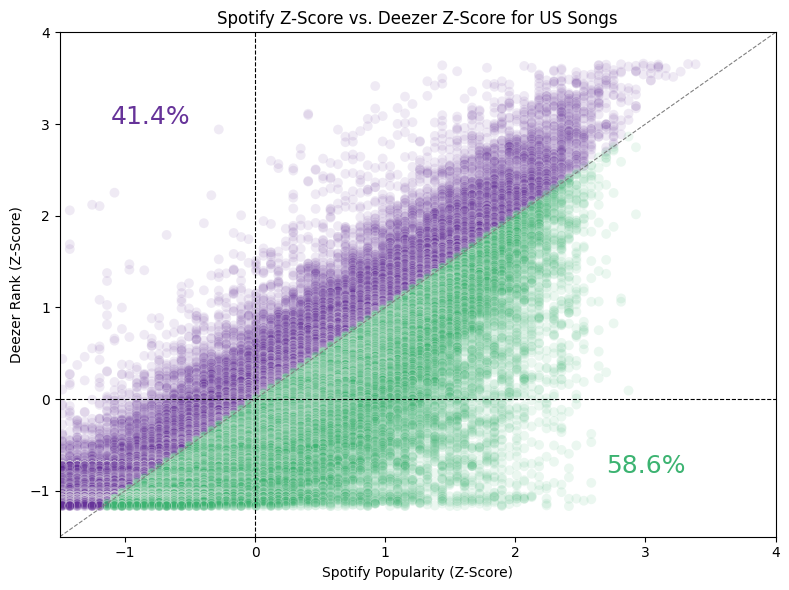

In [57]:
# Filter for US songs
df_us = df_filtered[df_filtered['isrc_prefix'] == 'US']

plt.figure(figsize=(8, 6))

# Add labels and title
plt.title('Spotify Z-Score vs. Deezer Z-Score for US Songs')
plt.xlabel('Spotify Popularity (Z-Score)')
plt.ylabel('Deezer Rank (Z-Score)')

# Determine colors based on comparison
colors = df_us.apply(
    lambda row: 'mediumseagreen' if row['spotify.popularity_zscore'] > row['deezer.rank_zscore'] else 'rebeccapurple', 
    axis=1
)

# Calculate the percentage of songs in each half
above_diagonal = (df_us['spotify.popularity_zscore'] > df_us['deezer.rank_zscore']).sum()
below_diagonal = len(df_us) - above_diagonal
total_songs = len(df_us)

percent_above = (above_diagonal / total_songs) * 100
percent_below = (below_diagonal / total_songs) * 100

# Add text annotations for percentages
plt.text(3.0, -0.8, f'{percent_above:.1f}%', color='mediumseagreen', fontsize=18, ha='center')
plt.text(-0.8, 3.0, f'{percent_below:.1f}%', color='rebeccapurple', fontsize=18, ha='center')

# Scatter plot with conditional coloring
sns.scatterplot(
    x='spotify.popularity_zscore', 
    y='deezer.rank_zscore', 
    data=df_us, 
    color=colors, 
    legend=False, 
    s=50,
    alpha=0.1
)

# Add a diagonal line
plt.plot([-1.5, 4], [-1.5, 4], color='gray', linestyle='--', linewidth=0.8)
# Set the same axis limits
plt.xlim(-1.5, 4)
plt.ylim(-1.5, 4)

# Add reference lines
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()

In [58]:
# Perform a paired t-test
t_stat, p_value = ttest_rel(df_us['spotify.popularity_zscore'], df_us['deezer.rank_zscore'])

# Display the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value}")

# Calculate Pearson's r
pearson_r, p_value_pearson = pearsonr(df_us['spotify.popularity_zscore'], df_us['deezer.rank_zscore'])

# Display the results
print(f"Pearson's r: {pearson_r:.4f}")
print(f"P-value: {p_value_pearson:.4f}")

T-statistic: 45.3784
P-value: 0.0
Pearson's r: 0.7805
P-value: 0.0000


statistically significant difference between Spotify and Deezer z-scores for French and US songs
Pearson's correlation coefficient suggests a moderate positive correlation between Spotify popularity and Deezer rank for French songs, indicating some level of agreement between the platforms. For US songs the correlation is much higher, accounting for around 60% of variance.


In [59]:
# Calculate the difference between Spotify popularity and Deezer rank
df['popularity_difference'] = df['spotify.popularity'] - df['deezer.rank']

# Find the song with the maximum difference
max_diff_song = df.loc[df['popularity_difference'].idxmax()]

# Display the result
max_diff_song

spotify.name                                      Clean Baby Sleep White Noise (Loopable)
spotify.album.name                                     Best White Noise For Sleeping Baby
spotify.duration_ms                                                                142222
spotify.popularity                                                                     97
spotify.id                                                         0zirWZTcXBBwGsevrsIpvT
spotify.external_ids.isrc                                                    NLC8M2000219
spotify.album.release_date_precision                                                  day
spotify.album.release_date                                                     2020-04-29
spotify.album.total_tracks                                                              6
spotify.disc_number                                                                     1
spotify.available_markets               ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...
spotify.ar

In [60]:
from scipy.stats import zscore

# Calculate z-scores for spotify.popularity and deezer.rank
df['spotify.popularity_zscore'] = zscore(df['spotify.popularity'])
df['deezer.rank_zscore'] = zscore(df['deezer.rank'])

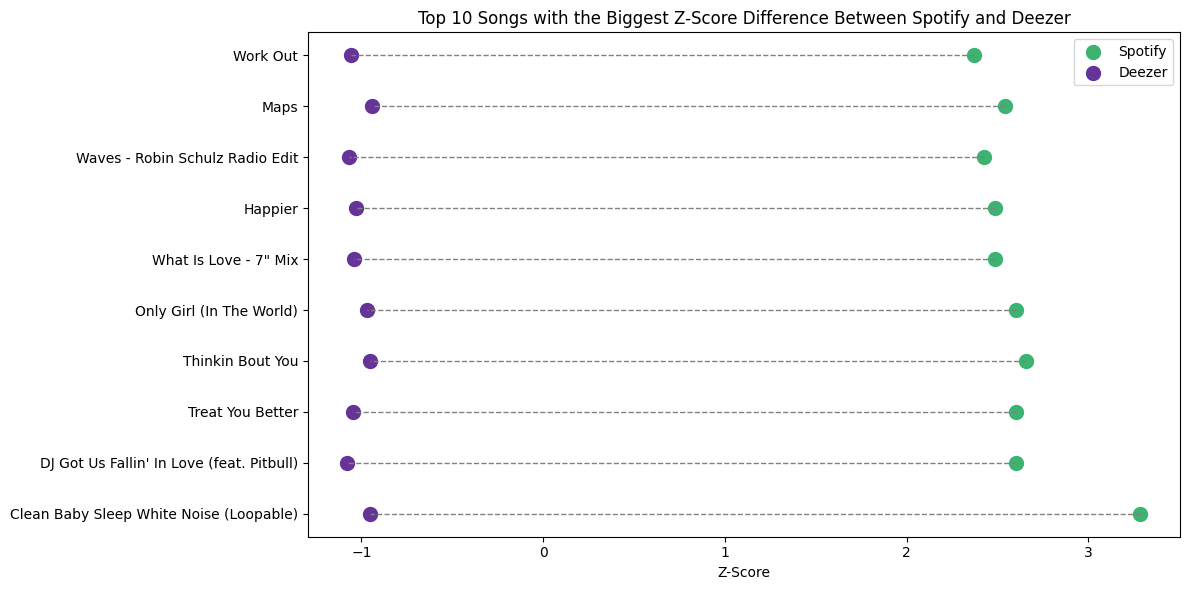

In [61]:
# Select the top 10 songs with the biggest z-score difference
top_10_diff_songs = df.nlargest(10, 'popularity_difference')

# Reset the index of top_10_diff_songs to ensure sequential y-axis values
top_10_diff_songs = top_10_diff_songs.reset_index()

# Create a figure
plt.figure(figsize=(12, 6))

# Plot two connected circles for each song
for i, row in top_10_diff_songs.iterrows():
    plt.plot(
        [row['spotify.popularity_zscore'], row['deezer.rank_zscore']],
        [i, i],
        color='gray', linestyle='--', linewidth=1
    )
    plt.scatter(row['spotify.popularity_zscore'], i, color='mediumseagreen', s=100, label='Spotify' if i == 0 else "")
    plt.scatter(row['deezer.rank_zscore'], i, color='rebeccapurple', s=100, label='Deezer' if i == 0 else "")

# Add labels and title
plt.title('Top 10 Songs with the Biggest Z-Score Difference Between Spotify and Deezer')
plt.xlabel('Z-Score')
plt.yticks(range(len(top_10_diff_songs)), top_10_diff_songs['spotify.name'])
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


Really this one doesn't really tell us anything as it just means deezer prefers a different version with different isrc

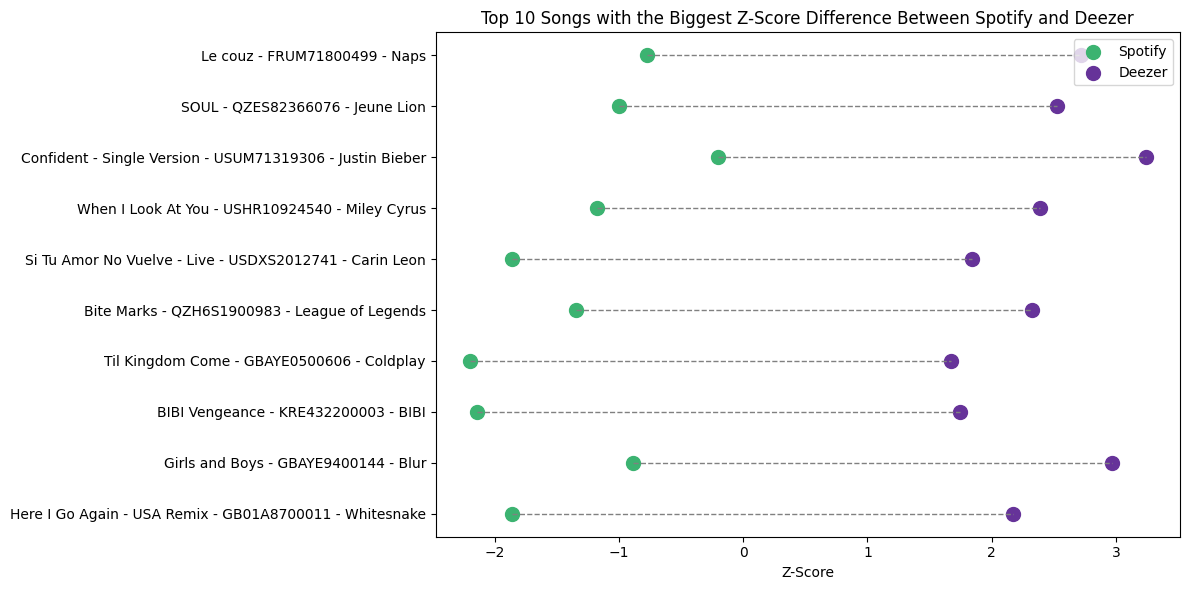

In [62]:
# Select the top 10 songs with the biggest z-score difference
top_10_diff_songs = df.nsmallest(10, 'popularity_difference')

# Reset the index of top_10_diff_songs to ensure sequential y-axis values
top_10_diff_songs = top_10_diff_songs.reset_index()

# Create a figure
plt.figure(figsize=(12, 6))

# Plot two connected circles for each song
for i, row in top_10_diff_songs.iterrows():
    plt.plot(
        [row['spotify.popularity_zscore'], row['deezer.rank_zscore']],
        [i, i],
        color='gray', linestyle='--', linewidth=1
    )
    plt.scatter(row['spotify.popularity_zscore'], i, color='mediumseagreen', s=100, label='Spotify' if i == 0 else "")
    plt.scatter(row['deezer.rank_zscore'], i, color='rebeccapurple', s=100, label='Deezer' if i == 0 else "")

# Add labels and title
plt.title('Top 10 Songs with the Biggest Z-Score Difference Between Spotify and Deezer')
plt.xlabel('Z-Score')
plt.yticks(range(len(top_10_diff_songs)), top_10_diff_songs['spotify.name'] + ' - ' + top_10_diff_songs['spotify.external_ids.isrc'] + ' - ' + top_10_diff_songs['spotify.artist_1'])
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


This one is interesting though